In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [32]:
df=pd.read_csv("C:/Users/Teja/Desktop/data science projects/loan prediction/train.csv")

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [34]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


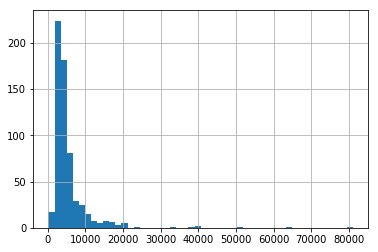

In [35]:
df['ApplicantIncome'].hist(bins=50)

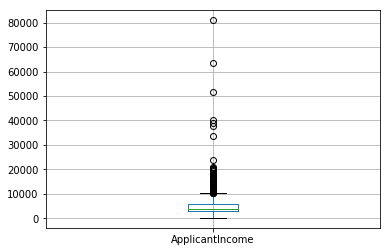

In [36]:
df.boxplot(column='ApplicantIncome')

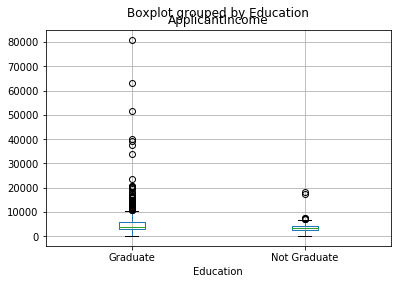

In [37]:
df.boxplot(column='ApplicantIncome',by='Education')

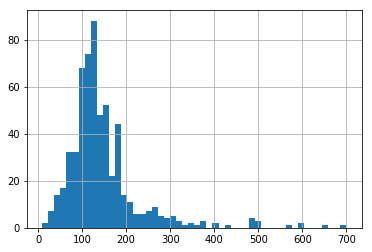

In [38]:
df['LoanAmount'].hist(bins=50)

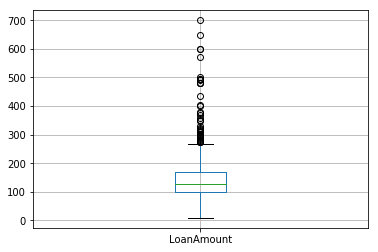

In [39]:
df.boxplot(column='LoanAmount')

In [40]:
temp1=df['Credit_History'].value_counts(ascending=True)
print(temp1)

0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [41]:
temp2=df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x:x.map({'Y':1,'N':0}).mean())
print(temp2)

                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


In [42]:
df.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [43]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [44]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [45]:
df['Self_Employed'].fillna('No',inplace=True)

In [46]:
df['LoanAmount_log']=np.log(df['LoanAmount'])

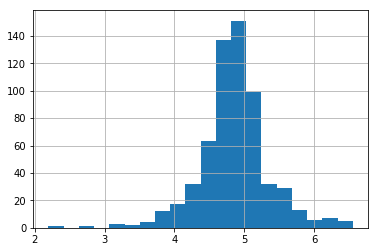

In [47]:
df['LoanAmount_log'].hist(bins=20)

In [48]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

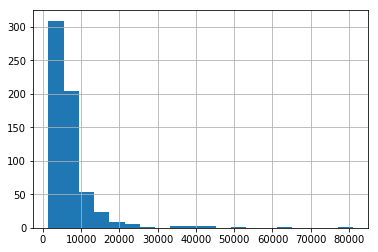

In [49]:
df['TotalIncome'].hist(bins=20)

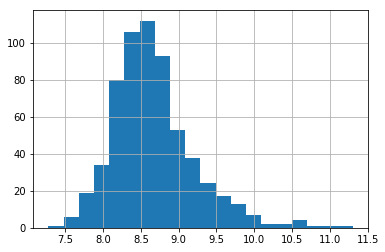

In [50]:
df['TotalIncome_log']=np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [51]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

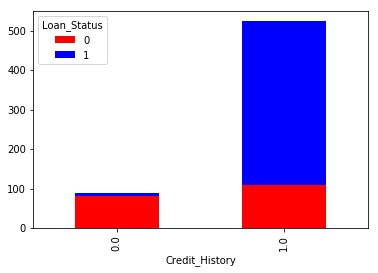

In [53]:
import pandas as pd
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn import metrics



In [55]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
def Classification_model(model,data,predictors,outcome):
    model.fit(data[predictors],data[outcome])
    predictions=model.predict(data[predictors])
    accuracy=metrics.accuracy_score(predictions,data[outcome])
    print("Accuracy: %s "%"{0:.3%} ".format(accuracy))
    kf = KFold(data.shape[0])

    error=[]
    for train,test in kf.split(data[predictors]):
        train_predictors=data[predictors].iloc[train,:]
        train_target=data[outcome].iloc[train]
        model.fit(train_predictors,train_target)
        error.append(model.score(data[predictors].iloc[test,:],data[outcome].iloc[test]))
    print("Cross validation score:%s "%" {0:.3%}".format(np.mean(error)))
    


outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
Classification_model(model, df,predictor_var,outcome_var)


Accuracy: 80.945%  
Cross validation score: 80.945% 


In [56]:
outcome_var = 'Loan_Status'
model = DecisionTreeClassifier()
predictor_var = ['Credit_History']
Classification_model(model, df,predictor_var,outcome_var)

Accuracy: 80.945%  
Cross validation score: 80.945% 


In [57]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
Classification_model(model, df,predictor_var,outcome_var)

Accuracy: 100.000%  
Cross validation score: 79.479% 
